In [1]:
import numpy as np
import cv2
import os
import matplotlib.pylab as plt

In [2]:
samples = []
label = []
for i in range(1, 27):
    for filename in os.listdir(f'English Alphabet/{i}'):
        img = cv2.imread(os.path.join(f'English Alphabet/{i}', filename))
        gray_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        gray_img = gray_img.reshape(-1)
        samples.append(gray_img/255)
        label.append(i)

In [7]:
x = np.array(samples)
y = np.array(label).reshape(-1, 1)

In [10]:
randomize = np.arange(len(x))
np.random.shuffle(randomize)
x = x[randomize]
y = y[randomize]

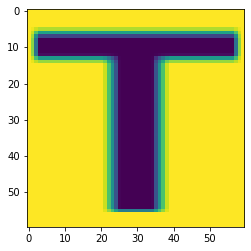

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(x[3].reshape(60, 60))

In [12]:
# round(len(x)*0.8)
x_train = x[0:round(len(x)*0.8), :]
x_test = x[round(len(x)*0.8):, :]

y_train = y[0:round(len(x)*0.8), :]
y_test = y[round(len(x)*0.8):, :]

In [13]:
x_train.shape

(416, 3600)

In [21]:
label[90]

5

In [122]:
y = np.zeros((520, 26))

for i in range(len(label)):
    y[i, label[i] -1] = 1

In [123]:
y[y == 0] = -1
y

array([[ 1., -1., -1., ..., -1., -1., -1.],
       [ 1., -1., -1., ..., -1., -1., -1.],
       [ 1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1.,  1.],
       [-1., -1., -1., ..., -1., -1.,  1.],
       [-1., -1., -1., ..., -1., -1.,  1.]])

In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [125]:
y_test.shape

(104, 26)

In [127]:
def perceptron(x, y, epoch, alpha):
    weight = np.random.randn(3600, 26)
    bias = np.random.randn(1, 26)

    for i in range(epoch):
        for j in range(len(x)):
            y_p = bias + x[j].reshape(1, -1) @ weight
            max_neuron = np.argmax(y_p)
            y_p[:] = -1
            y_p[0, max_neuron] = 1
            if np.array_equal(y_p, y[j].reshape(1, -1)):
                continue
            else:
                w_update =  alpha * x[j].reshape(-1, 1) @ y[j].reshape(1, -1)
                weight = weight + w_update

                b_update =  alpha * y[j].reshape(1, -1)
                bias = bias + b_update

    return weight, bias

                

In [128]:
weight, bias = perceptron(x=x_train, y=y_train, epoch=10, alpha=0.001)

In [129]:
y_p_test = bias + x_test @ weight

for i in range(len(y_p_test)):
    max_neuron = np.argmax(y_p_test[i, :])
    y_p_test[i, :] = -1
    y_p_test[i, max_neuron] = 1

In [130]:
acc = 0
for i in range(len(y_p_test)):
    if np.array_equal(y_p_test[i], y_test[i]):
        acc += 1

In [132]:
acc

1

In [131]:
acc / len(y_test)

0.009615384615384616